In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from rich.progress import track    #For progress visualization bar

In [3]:
labels = ['pituitary_tumor','no_tumor','meningioma_tumor','glioma_tumor']
train = r"C:\Users\Admin\Downloads\Brain-Tumor-Classification-DataSet-master\Brain-Tumor-Classification-DataSet-master\Training"
test = r"C:\Users\Admin\Downloads\Brain-Tumor-Classification-DataSet-master\Brain-Tumor-Classification-DataSet-master\Testing"

In [4]:
X_train = []
y_train = []
X_test = []
y_test =[]
img_size = (224,224)
for i in labels:
    folder_path = os.path.join(train,i)
    for j in track(os.listdir(folder_path), description=f"Processing Training images for {i}"):
        img = cv2.imread(os.path.join(folder_path,j))
        img = cv2.resize(img,img_size)
        X_train.append(img)
        y_train.append(i)
for i in labels:
    folder_path = os.path.join(test,i)
    for j in track(os.listdir(folder_path), description=f"Processing Testing images for {i}"):
        img = cv2.imread(os.path.join(folder_path,j))
        img = cv2.resize(img,img_size)
        X_test.append(img)
        y_test.append(i)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test =np.array(y_test)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

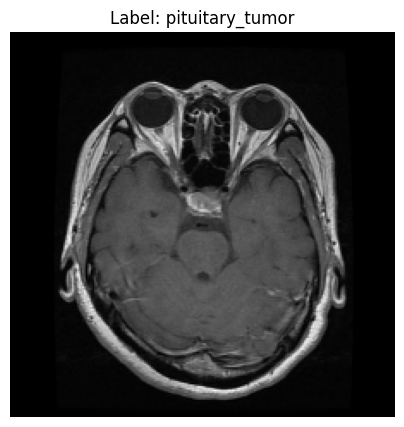

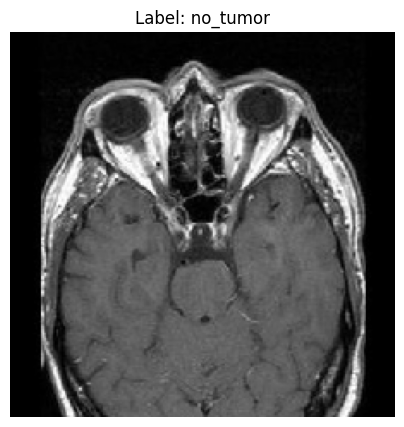

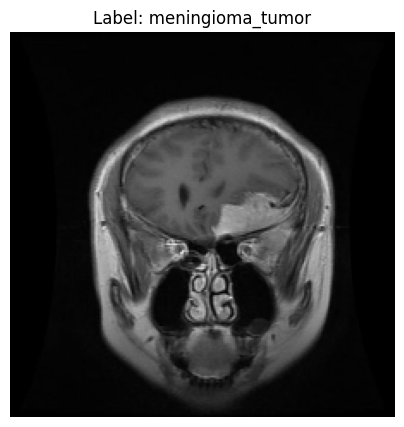

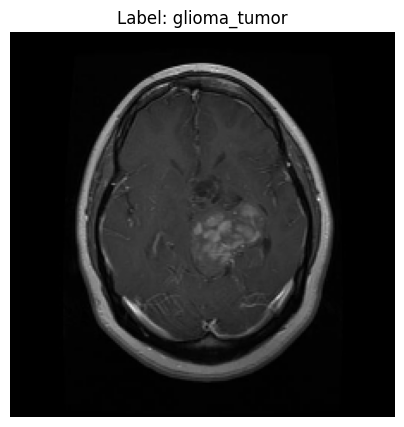

In [5]:
for label in labels:
    index = y_train.tolist().index(label)  
    img = X_train[index]
    
    # Convert the image from BGR to RGB for displaying with Matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(f'Label: {label}')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

In [6]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X_train, y_train = shuffle(X_train, y_train, random_state=101)

In [7]:
X_train.shape

(2870, 224, 224, 3)

In [8]:
y_train.shape

(2870,)

In [25]:
print(f"Length of X_train: {len(X_train)}")
print(f"Length of y_train: {len(y_train)}")
print(f"Length of X_test: {len(X_test)}")
print(f"Length of y_test: {len(y_test)}")

# Now, split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Length of X_train after split: {len(X_train)}")
print(f"Length of X_val: {len(X_val)}")

Length of X_train: 2583
Length of y_train: 2583
Length of X_test: 394
Length of y_test: 394
Length of X_train after split: 2066
Length of X_val: 517


In [26]:
# Label encode the target variables
le = LabelEncoder()
ohe = OneHotEncoder(sparse_output = False)
y_train_le = le.fit_transform(y_train)
y_val_le = le.transform(y_val)  # Use transform to ensure consistency
y_test_le = le.transform(y_test)

# Reshape to 2D for OneHotEncoder compatibility
y_train_le_reshaped = y_train_le.reshape(-1, 1)
y_val_le_reshaped = y_val_le.reshape(-1, 1)
y_test_le_reshaped = y_test_le.reshape(-1, 1)

# One-hot encode the label-encoded targets
y_train_encoded = ohe.fit_transform(y_train_le_reshaped)
y_val_encoded = ohe.transform(y_val_le_reshaped)  # Use transform to avoid refitting
y_test_encoded = ohe.transform(y_test_le_reshaped)

# Verify shapes
print("y_train_encoded shape:", y_train_encoded.shape)
print("y_val_encoded shape:", y_val_encoded.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

y_train_encoded shape: (2066, 4)
y_val_encoded shape: (517, 4)
y_test_encoded shape: (394, 4)


In [27]:
#Facing errors  # Debugging shapes
print("X_train shape:", X_train.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("X_val shape:", X_val.shape)
print("y_val_encoded shape:", y_val_encoded.shape)

X_train shape: (2066, 224, 224, 3)
y_train_encoded shape: (2066, 4)
X_val shape: (517, 224, 224, 3)
y_val_encoded shape: (517, 4)


In [11]:
print("Label Encoded and one-hot encoded y_train:", y_train_encoded)

Label Encoded and one-hot encoded y_train:   (0, 2)	1.0
  (1, 1)	1.0
  (2, 3)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 3)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 2)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 3)	1.0
  (19, 3)	1.0
  (20, 1)	1.0
  (21, 0)	1.0
  (22, 1)	1.0
  (23, 3)	1.0
  (24, 1)	1.0
  :	:
  (2558, 0)	1.0
  (2559, 3)	1.0
  (2560, 3)	1.0
  (2561, 2)	1.0
  (2562, 2)	1.0
  (2563, 1)	1.0
  (2564, 0)	1.0
  (2565, 0)	1.0
  (2566, 3)	1.0
  (2567, 1)	1.0
  (2568, 1)	1.0
  (2569, 2)	1.0
  (2570, 3)	1.0
  (2571, 2)	1.0
  (2572, 3)	1.0
  (2573, 0)	1.0
  (2574, 1)	1.0
  (2575, 1)	1.0
  (2576, 2)	1.0
  (2577, 3)	1.0
  (2578, 1)	1.0
  (2579, 3)	1.0
  (2580, 3)	1.0
  (2581, 3)	1.0
  (2582, 0)	1.0


In [12]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Define image size
img_size = 224  # Standard input size for EfficientNetB0 is 224x224

# Load EfficientNetB0 model without the top classification layer
effnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Add custom layers for transfer learning
x = effnet.output
x = GlobalAveragePooling2D()(x)  # Global average pooling reduces feature maps to a vector
x = Dropout(0.5)(x)              # Regularization to avoid overfitting
x = Dense(256, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)              # Additional dropout
output = Dense(4, activation='softmax')(x)  # Final output layer for classification

# Create the complete model
model = Model(inputs=effnet.input, outputs=output)

# Freeze EfficientNetB0 layers to retain pre-trained features
for layer in effnet.layers:
    layer.trainable = False  # Freeze the base model

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,378,535 (16.70 MB)

 Trainable params: 328,964 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
import datetime

# Callback for Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitors validation loss
    patience=5,          # Stops training if no improvement after 5 epochs
    restore_best_weights=True  # Restores the best weights at the end
)

# Callback for Model Checkpoint
checkpoint_path = "best_model.keras"
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,  # Filepath to save the model
    monitor='val_accuracy',    # Monitors validation accuracy
    save_best_only=True,       # Saves only the model with the best accuracy
    mode='max'                 # Maximizing accuracy
)

# Callback for Reducing Learning Rate on Plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',        # Monitors validation loss
    factor=0.2,                # Reduces learning rate by a factor of 2
    patience=3,                # Reduces LR if no improvement for 3 epochs
    min_lr=1e-6                # Minimum learning rate
)



In [20]:
import tensorflow as tf
print(tf.__version__)  # Should be 2.12.0 or higher


2.17.0


In [36]:
callbacks = [early_stopping, model_checkpoint, reduce_lr]


In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [39]:
# Train the model
history = model.fit(
    X_train,
    y_train_encoded,
    validation_split = 0.2,
    verbose=1,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 52s 820ms/step - accuracy: 0.4736 - loss: 1.2239 - val_accuracy: 0.7367 - val_loss: 0.6179 - learning_rate: 0.0010
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 39s 761ms/step - accuracy: 0.7185 - loss: 0.6699 - val_accuracy: 0.7754 - val_loss: 0.5417 - learning_rate: 0.0010
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 42s 813ms/step - accuracy: 0.7662 - loss: 0.5823 - val_accuracy: 0.8213 - val_loss: 0.4486 - learning_rate: 0.0010
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 37s 717ms/step - accuracy: 0.7815 - loss: 0.5529 - val_accuracy: 0.8140 - val_loss: 0.4470 - learning_rate: 0.0010
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 40s 767ms/step - accuracy: 0.8116 - loss: 0.4414 - val_accuracy: 0.8454 - val_loss: 0.4149 - learning_rate: 0.0010
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 775ms/step - accuracy: 0.8231 - loss: 0.4362 - val_accuracy: 0.8357 - val_loss: 0.4034 - learning_rate: 0.0010
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - accuracy: 0.8460 - loss: 0.394

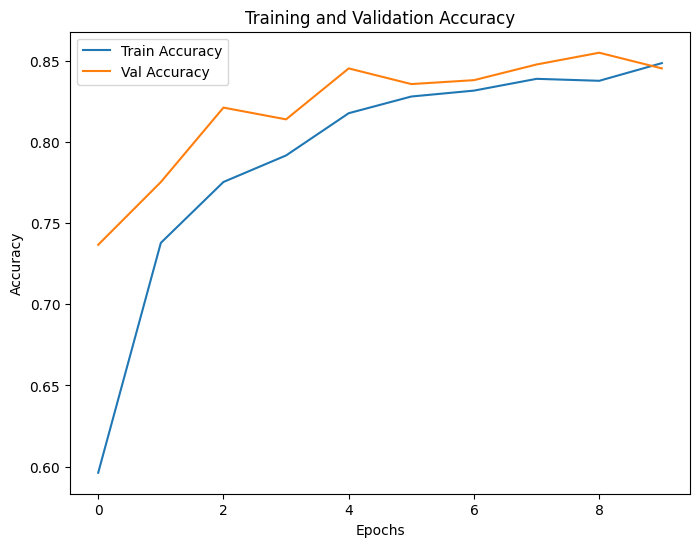

In [42]:
history_dict = history.history
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize=(8,6))
plt.plot(train_acc,label = 'Train Accuracy')
plt.plot(val_acc,label = 'Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

insights :Both training and validation accuracy improve consistently, which indicates that the model is learning effectively and generalizing well to the validation data.
The fact that the training and validation accuracies converge toward the end of training is a positive sign. It suggests that the model is not overfitting.

Trying with additional 10 epochs

In [43]:
additional_epochs = 10  # Additional epochs to train
total_epochs = 10 + additional_epochs

history_new = model.fit(
    X_train,
    y_train_encoded,
    validation_data=(X_val, y_val_encoded),
    verbose=1,
    initial_epoch=10,  # Start from epoch 11
    epochs=total_epochs,
    callbacks=callbacks
)


Epoch 11/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 50s 772ms/step - accuracy: 0.8224 - loss: 0.4236 - val_accuracy: 0.8375 - val_loss: 0.3960 - learning_rate: 0.0010
Epoch 12/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 52s 800ms/step - accuracy: 0.8568 - loss: 0.3784 - val_accuracy: 0.8549 - val_loss: 0.3702 - learning_rate: 0.0010
Epoch 13/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 75s 692ms/step - accuracy: 0.8463 - loss: 0.3669 - val_accuracy: 0.8607 - val_loss: 0.3707 - learning_rate: 0.0010
Epoch 14/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 51s 781ms/step - accuracy: 0.8502 - loss: 0.3640 - val_accuracy: 0.8685 - val_loss: 0.3573 - learning_rate: 0.0010
Epoch 15/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 51s 785ms/step - accuracy: 0.8508 - loss: 0.3480 - val_accuracy: 0.8646 - val_loss: 0.3817 - learning_rate: 0.0010
Epoch 16/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 49s 758ms/step - accuracy: 0.8540 - loss: 0.3809 - val_accuracy: 0.8665 - val_loss: 0.3411 - learning_rate: 0.0010
Epoch 17/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 55s 844ms/step - accuracy: 0.8597 - l

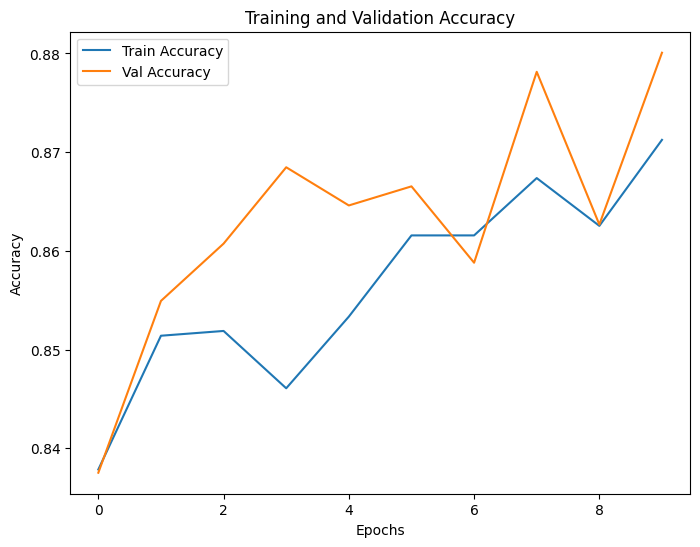

In [45]:
history_new_dict = history_new.history
train_acc_new = history_new_dict['accuracy']
val_acc_new = history_new_dict['val_accuracy']

plt.figure(figsize=(8,6))
plt.plot(train_acc_new,label = 'Train Accuracy')
plt.plot(val_acc_new,label = 'Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [46]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test_encoded,axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 742ms/step


In [47]:
print(y_test_new)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In this,
0 - Glioma Tumor
1 - No Tumor
2 - Meningioma Tumor
3 - Pituitary Tumor

In [49]:
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.91      0.20      0.33       100
           1       0.63      0.86      0.73       115
           2       0.77      0.96      0.85       105
           3       0.79      0.88      0.83        74

    accuracy                           0.72       394
   macro avg       0.77      0.73      0.68       394
weighted avg       0.77      0.72      0.68       394



In [50]:
print(confusion_matrix(y_test_new,pred))

[[ 20  49  21  10]
 [  2  99   9   5]
 [  0   2 101   2]
 [  0   8   1  65]]


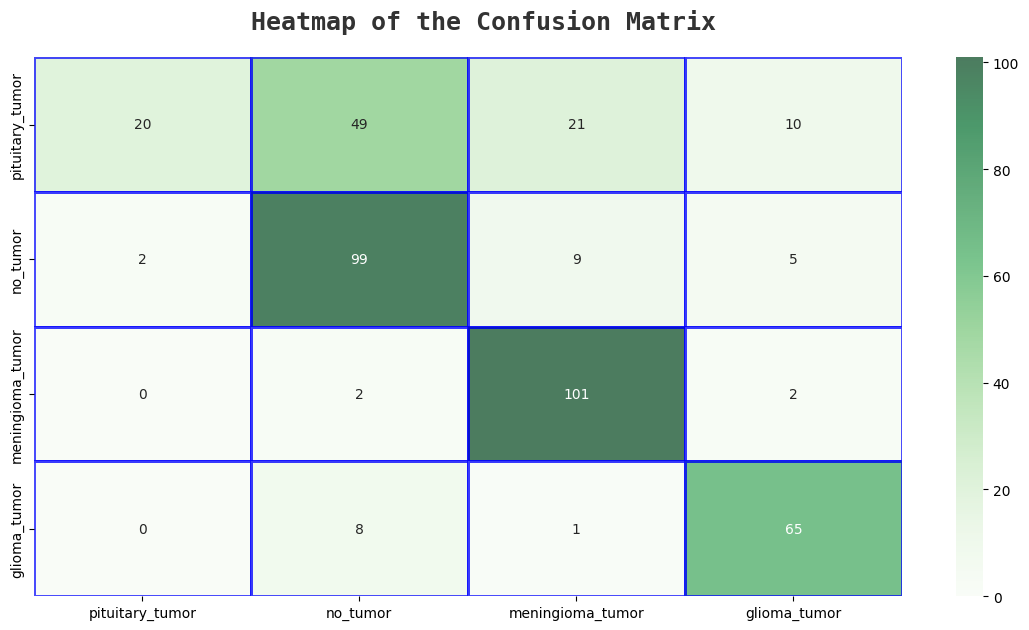

In [54]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_new, pred)

# Create the heatmap
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
sns.heatmap(
    cm,
    ax=ax,
    annot=True,  # Display the numbers in the heatmap
    xticklabels=labels,  # X-axis labels (class names)
    yticklabels=labels,  # Y-axis labels (class names)
    cmap="Greens",  # Use a predefined colormap
    alpha=0.7,      # Transparency of the heatmap
    linewidths=2,   # Line width between cells
    linecolor="blue",  # Color of the cell borders
    fmt = 'g'
)

# Add title
fig.text(
    s='Heatmap of the Confusion Matrix',
    size=18,
    fontweight='bold',
    fontname='monospace',
    y=0.92,
    x=0.28,
    alpha=0.8
)

# Display the plot
plt.show()


In [55]:
model.save('brain.keras')
print("Saved the model succcessfully")

Saved the model succcessfully
